In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product',
        'Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']

# 1. DATA CLEANSING

In [4]:
df = pd.read_csv('Train.csv')

In [5]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
7432,7433,C,Ship,5,2,254,2,low,F,5,4985,1
3112,3113,C,Ship,3,5,195,3,medium,F,47,2439,1
4471,4472,F,Ship,5,5,168,3,low,F,6,4088,1
7849,7850,F,Ship,6,3,170,4,low,M,1,4912,0
9346,9347,C,Ship,3,2,172,3,medium,F,8,4982,1


## A. Handle Missing Values

In [7]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Tidak ada missing values

## B. Handle Duplicated Data

In [9]:
df[nums].duplicated().sum()

0

Tidak ada data yang duplicated

## C. Handle Outliers

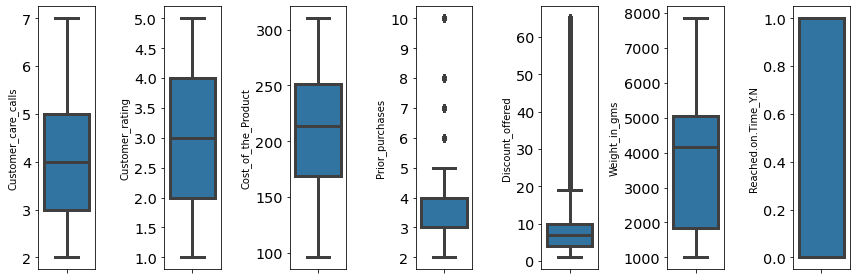

In [10]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot')

Terdapat Outlier pada Features Prior Purchases dan Discount Offered

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['Prior_purchases','Discount_offered']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 7971


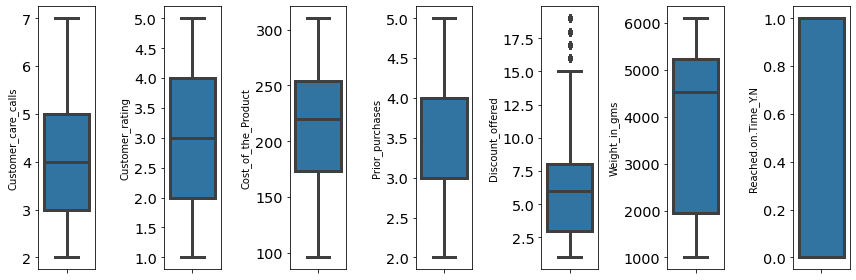

In [12]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot')

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

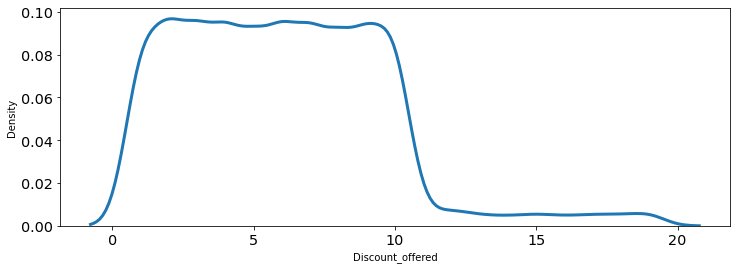

In [13]:
sns.kdeplot(df['Discount_offered'])

In [14]:
df['Discount_offered'].describe()

count    7971.000000
mean        5.986953
std         3.547644
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        19.000000
Name: Discount_offered, dtype: float64

In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['Discount_offered']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7971
Jumlah baris setelah memfilter outlier: 7794


<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

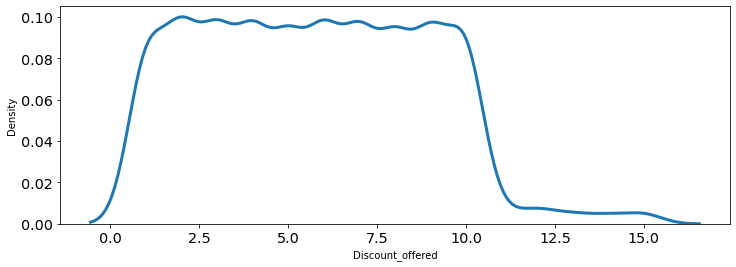

In [16]:
sns.kdeplot(df['Discount_offered'])

In [17]:
df['Discount_offered'].describe()

count    7794.000000
mean        5.722864
std         3.114797
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        15.000000
Name: Discount_offered, dtype: float64

## D. Feature Transformation

## E. Feature Encoding

In [18]:
df["Gender"].replace({"M":1 ,"F": 0},inplace=True)

In [19]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,B,Flight,3,3,176,4,medium,1,10,1177,1
5,6,F,Flight,3,1,162,3,medium,0,12,1417,1
6,7,D,Flight,3,4,250,3,low,0,3,2371,1
8,9,A,Flight,3,4,150,3,low,0,11,1861,1
10,11,C,Flight,3,4,189,2,medium,1,12,2888,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7794 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7794 non-null   int64 
 1   Warehouse_block      7794 non-null   object
 2   Mode_of_Shipment     7794 non-null   object
 3   Customer_care_calls  7794 non-null   int64 
 4   Customer_rating      7794 non-null   int64 
 5   Cost_of_the_Product  7794 non-null   int64 
 6   Prior_purchases      7794 non-null   int64 
 7   Product_importance   7794 non-null   object
 8   Gender               7794 non-null   int64 
 9   Discount_offered     7794 non-null   int64 
 10  Weight_in_gms        7794 non-null   int64 
 11  Reached.on.Time_Y.N  7794 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 1.0+ MB


## F. Handle Class Imbalance

# 2. Feature Engineering